In [34]:
import scipy.stats

In [106]:
def mann_whitney_u(data1, data2):
    # Get sorted data
    data1 = sorted(data1)
    data2 = sorted(data2)
    
    # Get numbers of observations
    n1 = len(data1)
    n2 = len(data2)
    max_rank = len(data1) + len(data2)
    
    # Placeholders to keep the ranks
    ranks1 = []
    ranks2 = []
    current_rank = 1
    
    # Place rank in correct holder
    while current_rank <= max_rank:
        if len(data2) == 0:
            ranks1.append(current_rank)
            current_rank += 1
            data1.pop(0)
        elif len(data1) == 0:
            ranks2.append(current_rank)
            current_rank += 1
            data2.pop(0)
        else:
            if data1[0] == data2[0]:
                ranks1.append(current_rank + 0.5)
                ranks2.append(current_rank + 0.5)
                current_rank += 2
                data1.pop(0)
                data2.pop(0)
            elif data1[0] < data2[0]:
                ranks1.append(current_rank)
                current_rank += 1
                data1.pop(0)
            elif data2[0] < data1[0]:
                ranks2.append(current_rank)
                current_rank += 1
                data2.pop(0)
    
    # Get rank sums and U statistic
    R1 = sum(ranks1)
    R2 = sum(ranks2)
    U1 = R1 - ((n1 * (n1 + 1)) / 2)
    U2 = R2 - ((n2 * (n2 + 1)) / 2)
    U = min(U1, U2)
    
    # Normal approximation
    mu = (n1 * n2) / 2
    sg = ((n1 * n2 * (n1 + n2 + 1)) / 12) ** 0.5
    z = (U - mu) / sg
    p_val = scipy.stats.norm(0, 1).cdf(z)
    return p_val

In [89]:
data1 = [4.5, 2.3, 1.1, 2.1, 2.2, 2.4, 3.2, 8.9, 6.6, 6.3, 2.3]
data2 = [4.3, 2.5, 5.5, 5.6, 6.2, 5.2, 5.3, 2.8, 8.8]

In [90]:
mann_whitney_u(data1, data2)

0.06923835751605856

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
data = pd.read_excel('Table_784a_201803.xlsx', sheet_name='Mar_2018_qtr', skiprows=19, skipfooter=15, usecols=[1, 2, 12], names=['Local Authority', 'RegionE', 'Homeless per 1000'])

In [93]:
south = ['SE', 'SW', 'EE']
north = ['NW', 'NE', 'YH']
london = ['L']

In [94]:
data['Homeless per 1000'] = data['Homeless per 1000'].replace('--', np.nan)
data = data.dropna()

In [95]:
sample_south = data[data['RegionE'].isin(south)].sample(30, random_state=4)
sample_north = data[data['RegionE'].isin(north)].sample(30, random_state=4)
sample_london = data[data['RegionE'].isin(london)].sample(30, random_state=4)

In [96]:
data = pd.concat([sample_north, sample_south, sample_london], keys=['South', 'North', 'London']).reset_index()[['Local Authority', 'level_0', 'Homeless per 1000']]
data.columns = ['Local Authority', 'Region', 'Homeless per 1000']

In [97]:
data.sample(12, random_state=4).to_latex()

'\\begin{tabular}{lllr}\n\\toprule\n{} &           Local Authority &  Region &  Homeless per 1000 \\\\\n\\midrule\n14 &                Rossendale &   South &               0.46 \\\\\n10 &                Calderdale &   South &               0.22 \\\\\n76 &                     Brent &  London &               0.64 \\\\\n65 &    Kensington and Chelsea &  London &               1.12 \\\\\n37 &                    Thanet &   North &               0.71 \\\\\n61 &                   Lambeth &  London &               0.53 \\\\\n43 &                  Cornwall &   North &               0.32 \\\\\n41 &      Reigate and Banstead &   North &               0.33 \\\\\n20 &                 Gateshead &   South &               0.49 \\\\\n74 &                 Redbridge &  London &               0.91 \\\\\n86 &                   Enfield &  London &               0.88 \\\\\n13 &  East Riding of Yorkshire &   South &               0.46 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [98]:
data_south = list(data[data['Region']=='South']['Homeless per 1000'])
data_north = list(data[data['Region']=='North']['Homeless per 1000'])
data_london = list(data[data['Region']=='London']['Homeless per 1000'])

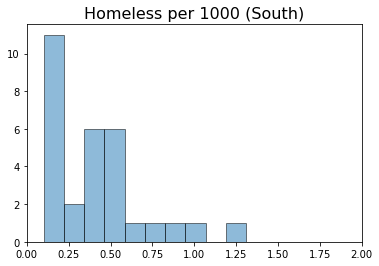

In [99]:
plt.hist(data_south, edgecolor='black', alpha=0.5)
plt.xlim(0, 2)
plt.title('Homeless per 1000 (South)', fontsize=16)
plt.savefig('south_homeless.pdf')
plt.show()

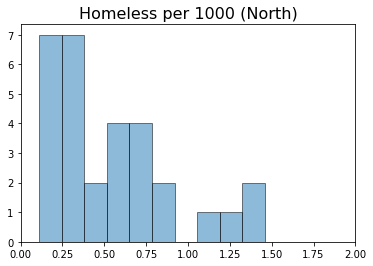

In [100]:
plt.hist(data_north, edgecolor='black', alpha=0.5)
plt.xlim(0, 2)
plt.title('Homeless per 1000 (North)', fontsize=16)
plt.savefig('north_homeless.pdf')
plt.show()

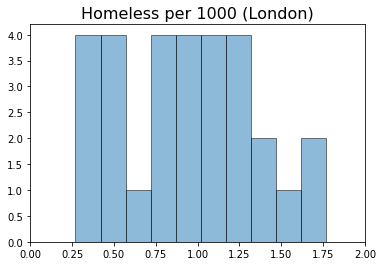

In [101]:
plt.hist(data_london, edgecolor='black', alpha=0.5)
plt.xlim(0, 2)
plt.title('Homeless per 1000 (London)', fontsize=16)
plt.savefig('london_homeless.pdf')
plt.show()

In [102]:
mann_whitney_u(data_north+data_south, data_london)

4.388061912191502e-07

In [103]:
mann_whitney_u(data_south, data_north)

0.0620756405457464